# Content-Based Recommender System Based on Similarity

### 1- Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 2- Getting data

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_csv('u.data', sep='\t', names=column_names)

In [3]:
data.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles=pd.read_csv('Movie_Id_Titles')

In [5]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [6]:
df=pd.merge(data,movie_titles,on='item_id')

In [7]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
df.shape

(100003, 5)

### 3- Data Cleaning

In [9]:
df.isnull().sum()

user_id      0
item_id      0
rating       0
timestamp    0
title        0
dtype: int64

### 4- Exploratory data analysis (EDA)

###### 4-1- Rating Frequency

Text(0.5, 1.0, 'Rating frequency')

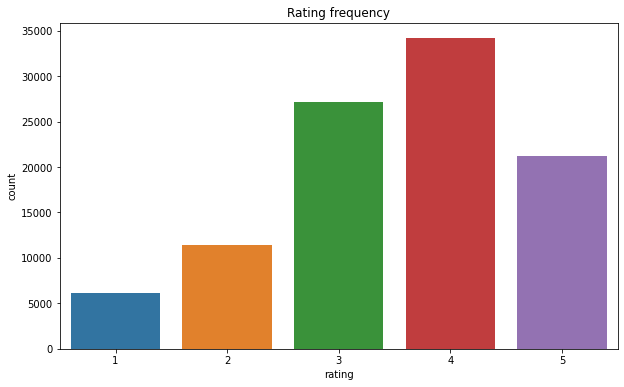

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='rating', data=df)
plt.title('Rating frequency')

We can see that most of the users gave rating 4.

###### 4-2- Mean Rating of movies

In [11]:
mean=df.groupby('title').mean()['rating'].sort_values(ascending=False)

###### 4-3- Number of Ratings of movies

In [12]:
number=df.groupby('title').count()['rating'].sort_values(ascending=False)

In [13]:
df_rating=pd.DataFrame({'Mean Rating':df.groupby('title').mean()['rating'], 'Number of Rating': df.groupby('title').count()['rating']})

In [14]:
df_rating.head()

,Mean Rating,Number of Rating
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


###### 4-4- Histograms

Text(0.5, 1.0, 'Distribution of Number of Ratings')

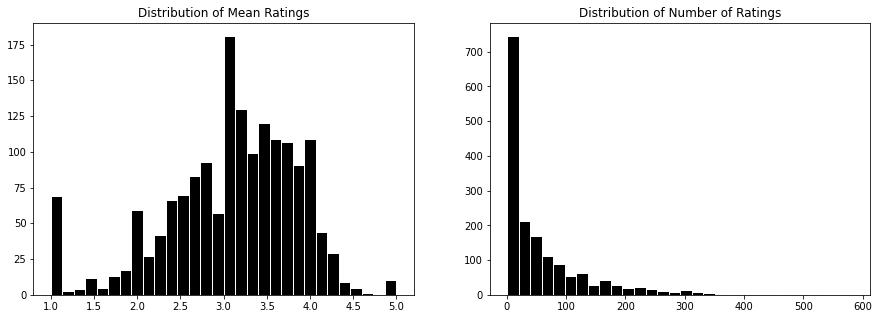

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist(df_rating['Mean Rating'],bins=30,edgecolor='white',color='black')
plt.title('Distribution of Mean Ratings')


plt.subplot(1,2,2)
plt.hist(df_rating['Number of Rating'],bins=30,edgecolor='white',color='black')

plt.title('Distribution of Number of Ratings')

###### 4-5- Scatter Plot

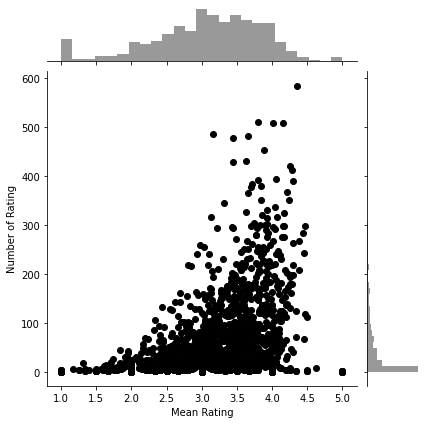

In [16]:
sns.jointplot('Mean Rating','Number of Rating',df_rating,color='black')

### 5- Recommender System

In [17]:
matrix=pd.pivot_table(data=df, index=df['user_id'], columns=df['title'],values='rating')

In [18]:
matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df_rating.sort_values(by='Number of Rating',ascending=False)

,Mean Rating,Number of Rating
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


We choose the first (Star Wars (1977)) and fifth (Liar Liar (1997)) movies regarding the number of rating.

###### 5-1- Movies similar to Starwars

In [20]:
matrix.corrwith(matrix['Star Wars (1977)'])

C:\Users\Soha\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Soha\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


title
'Til There Was You (1997)                0.872872
1-900 (1994)                            -0.645497
101 Dalmatians (1996)                    0.211132
12 Angry Men (1957)                      0.184289
187 (1997)                               0.027398
                                           ...   
Young Guns II (1990)                     0.228615
Young Poisoner's Handbook, The (1995)   -0.007374
Zeus and Roxanne (1997)                  0.818182
unknown                                  0.723123
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [21]:
df_corr1=pd.DataFrame({'Correlation with StarWar':matrix.corrwith(matrix['Star Wars (1977)'])})

In [22]:
df_corr1.head()

,Correlation with StarWar
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Threshold=100

In [23]:
df_joined1=df_rating.join(df_corr1)

In [24]:
df_joined1.head()

,Mean Rating,Number of Rating,Correlation with StarWar
title,,,
'Til There Was You (1997),2.333333,9,0.872872
1-900 (1994),2.600000,5,-0.645497
101 Dalmatians (1996),2.908257,109,0.211132
12 Angry Men (1957),4.344000,125,0.184289
187 (1997),3.024390,41,0.027398


In [31]:
df_joined1[df_joined1['Number of Rating']>100].sort_values(by=['Correlation with StarWar','Number of Rating'],ascending=False)

,Mean Rating,Number of Rating,Correlation with StarWar
title,,,
Star Wars (1977),4.359589,584,1.000000
"Empire Strikes Back, The (1980)",4.206522,368,0.748353
Return of the Jedi (1983),4.007890,507,0.672556
Raiders of the Lost Ark (1981),4.252381,420,0.536117
Austin Powers: International Man of Mystery (1997),3.246154,130,0.377433
...,...,...,...
"Edge, The (1997)",3.539823,113,-0.127167
As Good As It Gets (1997),4.196429,112,-0.130466
Crash (1996),2.546875,128,-0.148507


We see that the most similar movies to StarWar are Empire Strikes Back,Return of the Jedi (1983),Raiders of the Lost Ark (1981) andAustin Powers: International Man of Mystery (1997).

###### 5-2- Movies similar to Liar Liar

In [26]:
matrix.corrwith(matrix['Liar Liar (1997)'])

title
'Til There Was You (1997)                0.118913
1-900 (1994)                                  NaN
101 Dalmatians (1996)                    0.469765
12 Angry Men (1957)                      0.066272
187 (1997)                               0.175145
                                           ...   
Young Guns II (1990)                     0.352174
Young Poisoner's Handbook, The (1995)    0.445016
Zeus and Roxanne (1997)                 -0.500000
unknown                                  0.870388
Á köldum klaka (Cold Fever) (1994)            NaN
Length: 1664, dtype: float64

In [27]:
df_corr2=pd.DataFrame({'Correlation with Liar Liar':matrix.corrwith(matrix['Liar Liar (1997)'])})

In [28]:
df_corr2.head()

,Correlation with Liar Liar
title,
'Til There Was You (1997),0.118913
1-900 (1994),NaN
101 Dalmatians (1996),0.469765
12 Angry Men (1957),0.066272
187 (1997),0.175145


In [29]:
df_joined2=df_rating.join(df_corr2)

In [30]:
df_joined2[df_joined2['Number of Rating']>100].sort_values(by='Correlation with Liar Liar',ascending=False)

,Mean Rating,Number of Rating,Correlation with Liar Liar
title,,,
Liar Liar (1997),3.156701,485,1.000000
Batman Forever (1995),2.666667,114,0.516968
"Mask, The (1994)",3.193798,129,0.484650
Down Periscope (1996),2.702970,101,0.472681
Con Air (1997),3.459854,137,0.469828
...,...,...,...
Hoop Dreams (1994),4.094017,117,-0.184503
Ed Wood (1994),3.601504,133,-0.199481
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963),4.252577,194,-0.238092


We see that the most similar movies to LiarLiar are Batman Forever (1995),Mask, The (1994),Mask, The (1994),Down Periscope (1996) and Con Air (1997). 